In [1]:
import pandas as pd

In [2]:
df=pd.read_csv("StudentsPerformance.csv")

In [3]:
df

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75
...,...,...,...,...,...,...,...,...
995,female,group E,master's degree,standard,completed,88,99,95
996,male,group C,high school,free/reduced,none,62,55,55
997,female,group C,high school,free/reduced,completed,59,71,65
998,female,group D,some college,standard,completed,68,78,77


In [4]:
df.describe()

,math score,reading score,writing score
count,1000.00000,1000.000000,1000.000000
mean,66.08900,69.169000,68.054000
std,15.16308,14.600192,15.195657
min,0.00000,17.000000,10.000000
25%,57.00000,59.000000,57.750000
50%,66.00000,70.000000,69.000000
75%,77.00000,79.000000,79.000000
max,100.00000,100.000000,100.000000


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   gender                       1000 non-null   object
 1   race/ethnicity               1000 non-null   object
 2   parental level of education  1000 non-null   object
 3   lunch                        1000 non-null   object
 4   test preparation course      1000 non-null   object
 5   math score                   1000 non-null   int64 
 6   reading score                1000 non-null   int64 
 7   writing score                1000 non-null   int64 
dtypes: int64(3), object(5)
memory usage: 62.6+ KB


In [6]:
df.isna().sum()

gender                         0
race/ethnicity                 0
parental level of education    0
lunch                          0
test preparation course        0
math score                     0
reading score                  0
writing score                  0
dtype: int64

In [7]:
df.duplicated().sum()

0

In [8]:
df=df.drop_duplicates()

In [9]:
df.shape

(1000, 8)

In [10]:
df.columns

Index(['gender', 'race/ethnicity', 'parental level of education', 'lunch',
       'test preparation course', 'math score', 'reading score',
       'writing score'],
      dtype='object')

In [11]:
df["mean score"] = ((df["math score"] + df["reading score"] + df["writing score"]) / 3).round()
bins = [0, 60, 75, 90, 100]  # Define bins for performance categories
labels = ["Low", "Average", "Good", "Excellent"]
df["performance"] = pd.cut(df["mean score"], bins=bins, labels=labels)
df.head(10)

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score,mean score,performance
0,female,group B,bachelor's degree,standard,none,72,72,74,73.0,Average
1,female,group C,some college,standard,completed,69,90,88,82.0,Good
2,female,group B,master's degree,standard,none,90,95,93,93.0,Excellent
3,male,group A,associate's degree,free/reduced,none,47,57,44,49.0,Low
4,male,group C,some college,standard,none,76,78,75,76.0,Good
5,female,group B,associate's degree,standard,none,71,83,78,77.0,Good
6,female,group B,some college,standard,completed,88,95,92,92.0,Excellent
7,male,group B,some college,free/reduced,none,40,43,39,41.0,Low
8,male,group D,high school,free/reduced,completed,64,64,67,65.0,Average
9,female,group B,high school,free/reduced,none,38,60,50,49.0,Low


In [12]:
df["gender"].value_counts()

female    518
male      482
Name: gender, dtype: int64

In [13]:
from sklearn.preprocessing import LabelEncoder
lc=LabelEncoder()

In [14]:
df["gender"]=lc.fit_transform(df["gender"])
df["race/ethnicity"]=lc.fit_transform(df["race/ethnicity"])
df["parental level of education"]=lc.fit_transform(df["parental level of education"])
df["lunch"]=lc.fit_transform(df["lunch"])
df["test preparation course"]=lc.fit_transform(df["test preparation course"])
df["performance"]=lc.fit_transform(df["performance"])

In [15]:
df.head(10)

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score,mean score,performance
0,0,1,1,1,1,72,72,74,73.0,0
1,0,2,4,1,0,69,90,88,82.0,2
2,0,1,3,1,1,90,95,93,93.0,1
3,1,0,0,0,1,47,57,44,49.0,3
4,1,2,4,1,1,76,78,75,76.0,2
5,0,1,0,1,1,71,83,78,77.0,2
6,0,1,4,1,0,88,95,92,92.0,1
7,1,1,4,0,1,40,43,39,41.0,3
8,1,3,2,0,0,64,64,67,65.0,0
9,0,1,2,0,1,38,60,50,49.0,3


In [16]:
df["test preparation course"].value_counts()

1    642
0    358
Name: test preparation course, dtype: int64

In [17]:
import matplotlib.pyplot as plt
import seaborn as sns

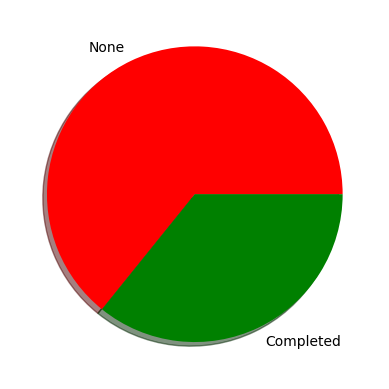

In [18]:
labels=["None","Completed"]
colors=["red","green"]
plt.pie(df["test preparation course"].value_counts(),labels=labels,colors=colors,shadow=True,)
plt.show()

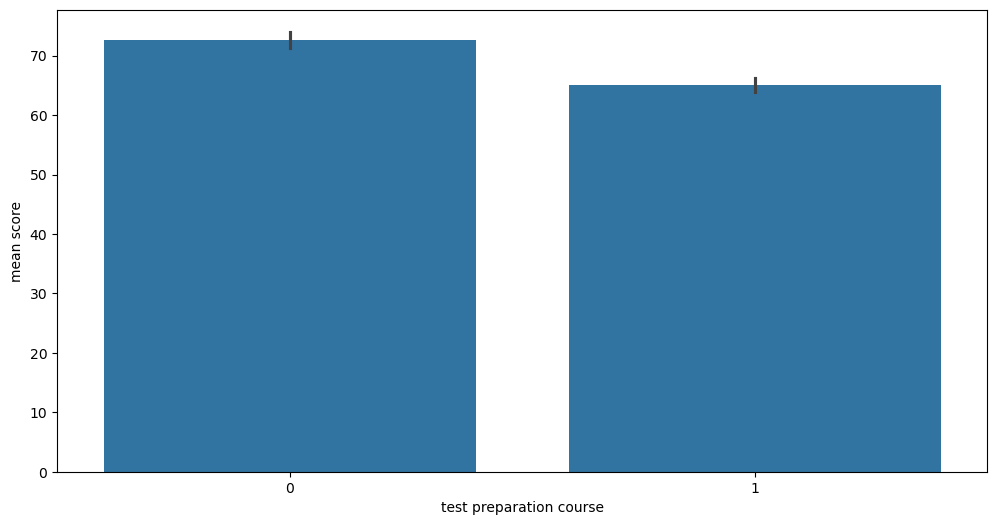

In [19]:
plt.figure(figsize=(12,6))
sns.barplot(x="test preparation course",y="mean score",data=df)
plt.show()

<Axes: xlabel='lunch', ylabel='mean score'>

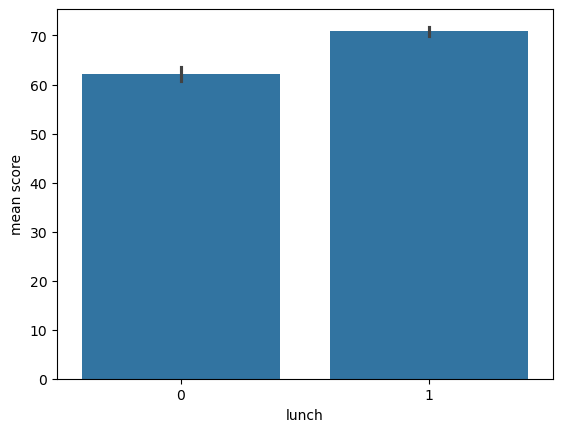

In [20]:
sns.barplot(x=df["lunch"],y=df["mean score"],data=df)

<Axes: xlabel='parental level of education', ylabel='mean score'>

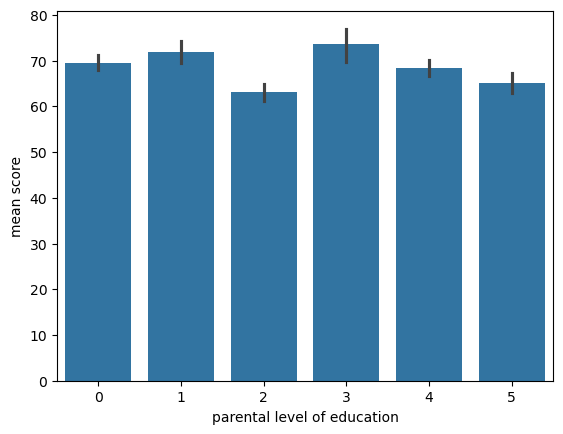

In [21]:
sns.barplot(x="parental level of education",y="mean score",data=df)

<Figure size 1200x600 with 0 Axes>

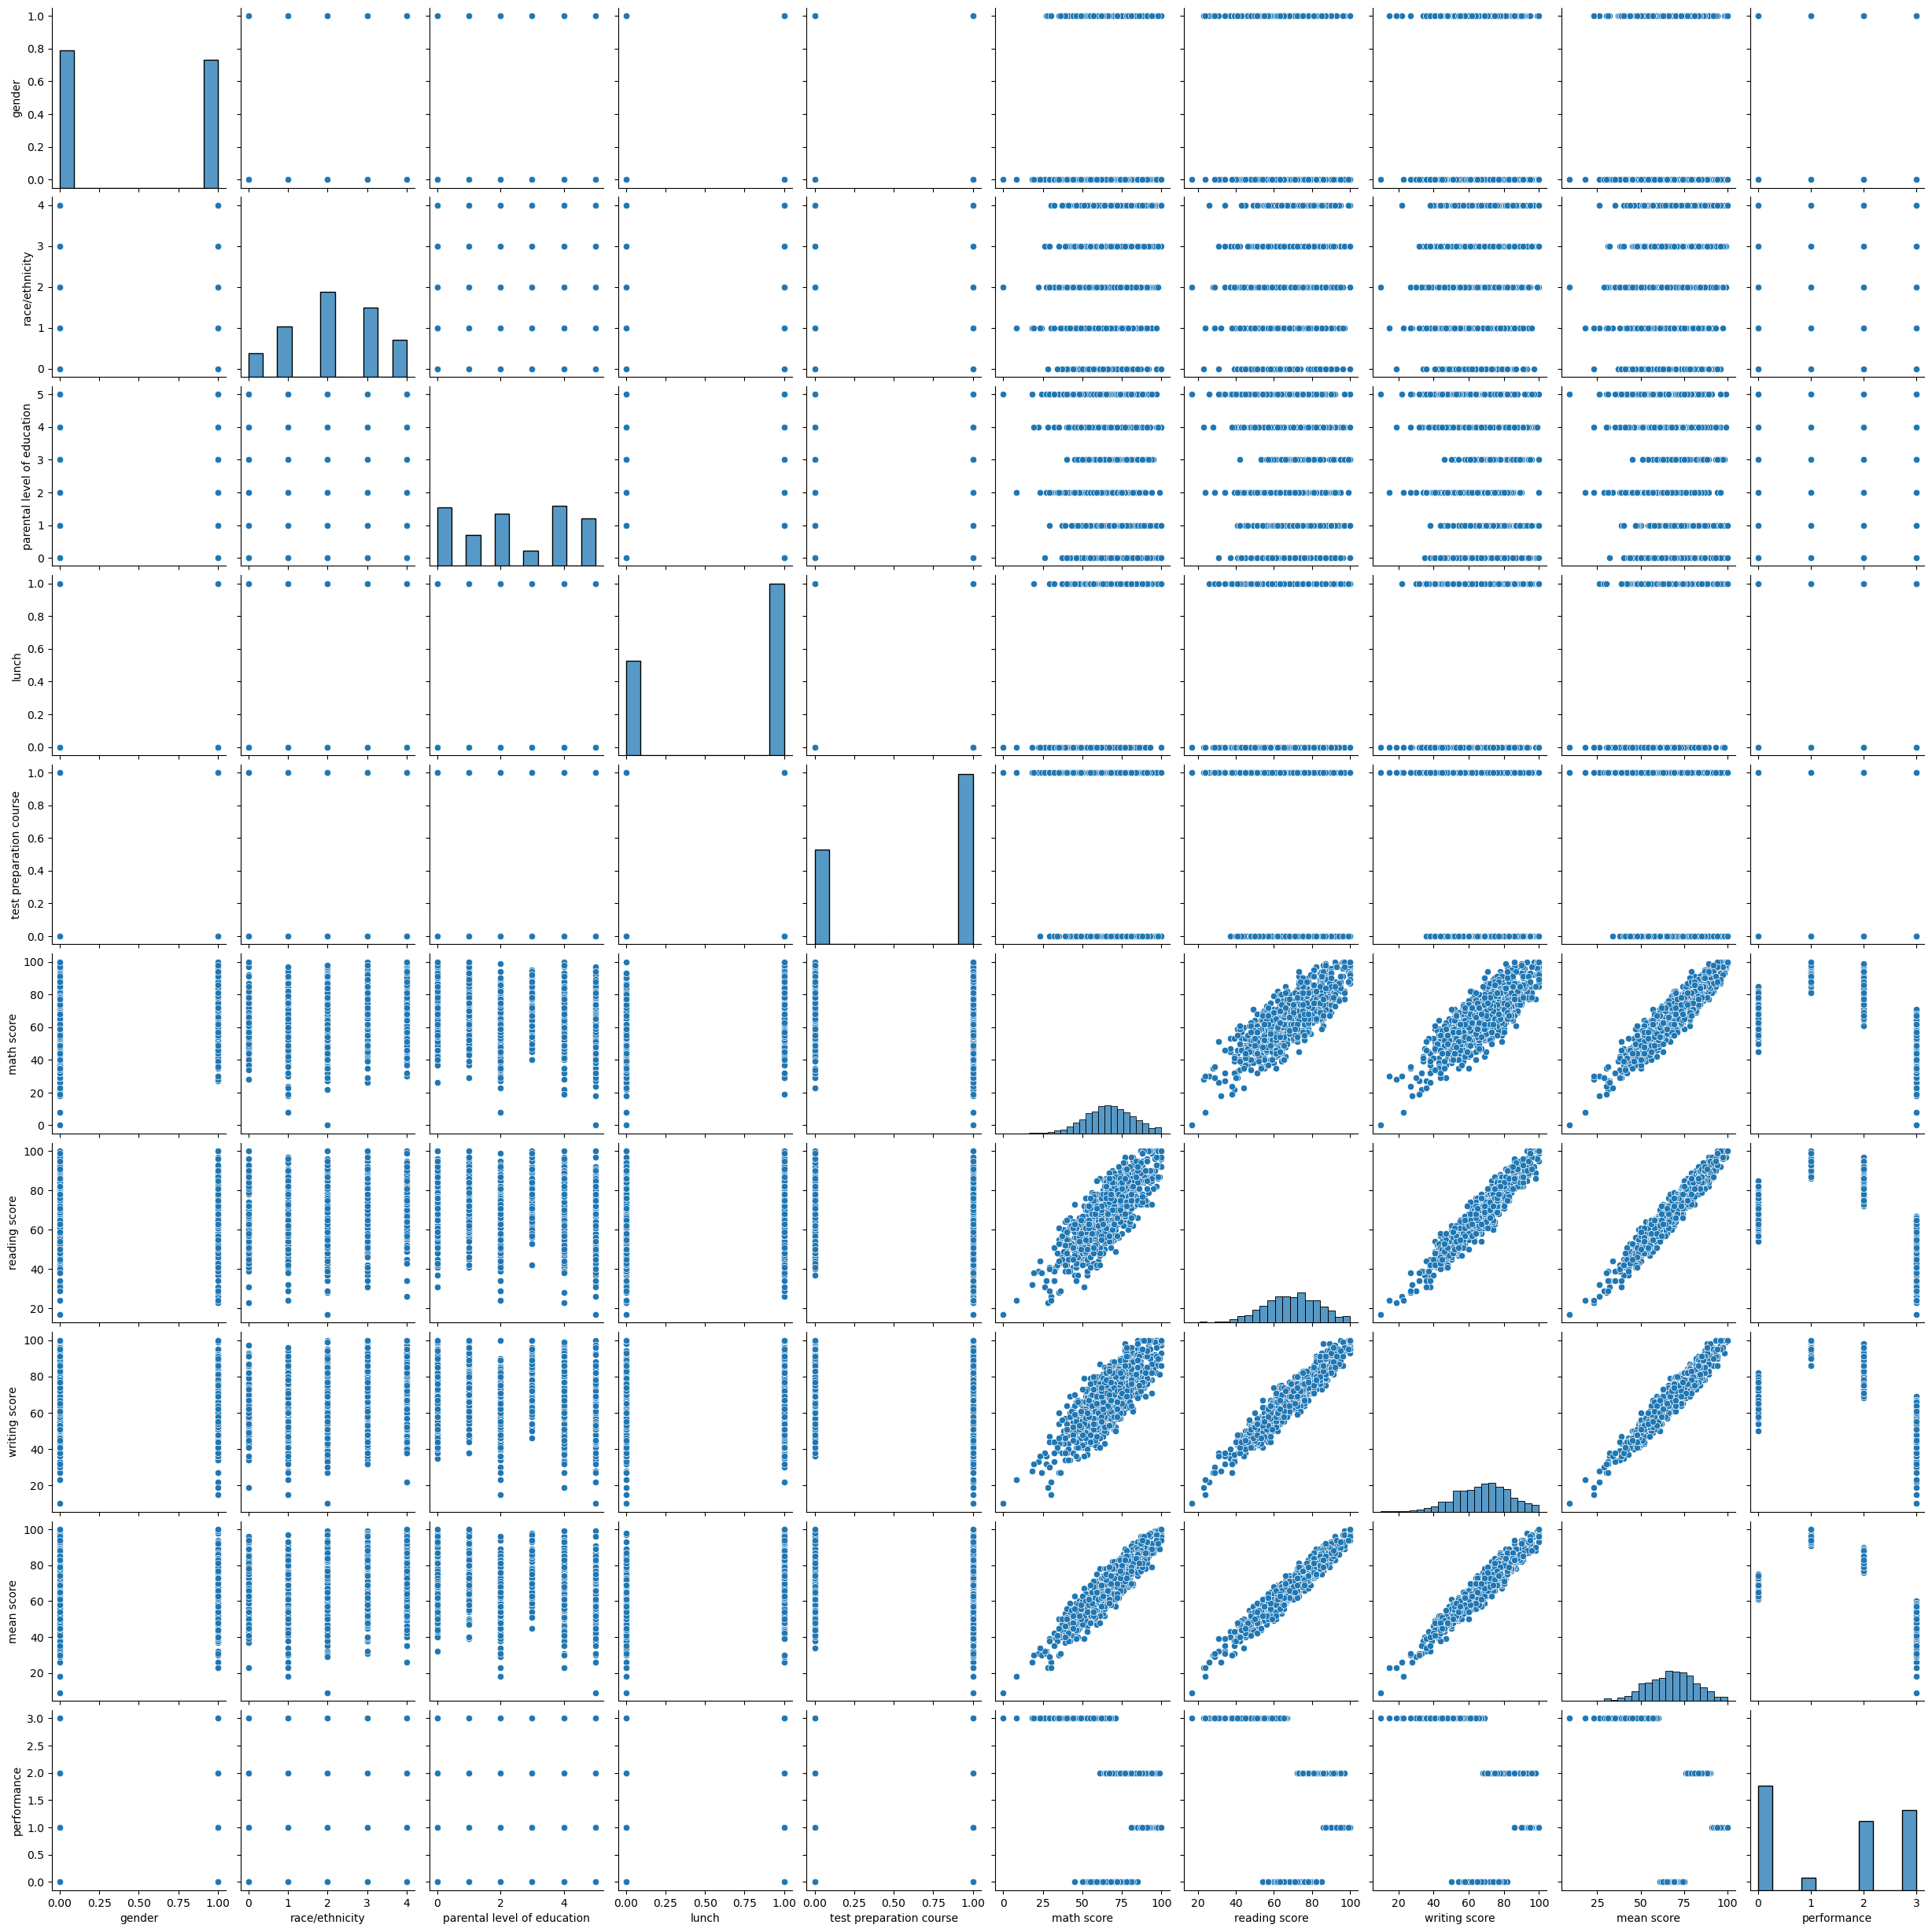

In [22]:
plt.figure(figsize=(12,6))
sns.pairplot(df)
plt.show()

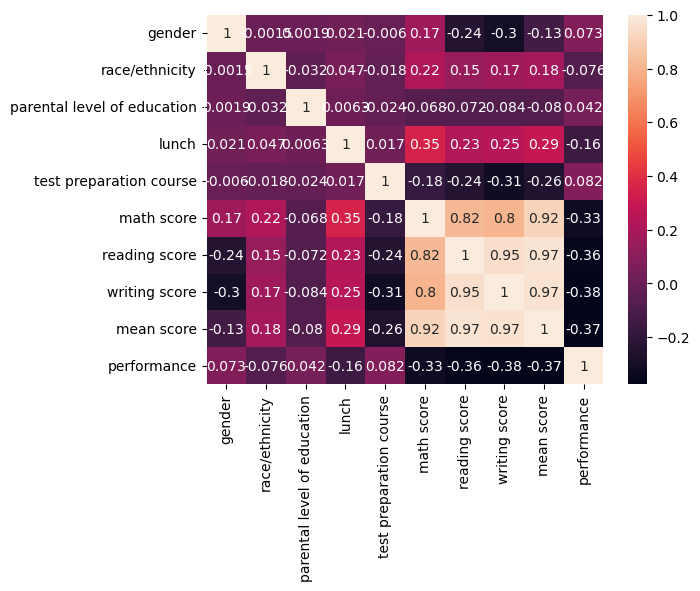

In [23]:
sns.heatmap(df.corr(),annot=True)
plt.show()

In [24]:
x=df.drop(["performance"],axis=1)
y=df["performance"]

In [25]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.02,random_state=2)

In [26]:
scaler=StandardScaler()
x_train=scaler.fit_transform(x_train)
x_test=scaler.fit_transform(x_test)

In [27]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report,confusion_matrix

In [62]:
model=RandomForestClassifier(n_estimators=200,max_depth=2,random_state=42)
model.fit(x_train,y_train)

RandomForestClassifier(max_depth=2, n_estimators=200, random_state=42)

In [63]:
y_pred=model.predict(x_test)

In [64]:
import warnings
warnings.filterwarnings("ignore")

In [65]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.67      0.75      0.71         8
           2       0.60      1.00      0.75         3
           3       1.00      0.67      0.80         9

    accuracy                           0.75        20
   macro avg       0.76      0.81      0.75        20
weighted avg       0.81      0.75      0.75        20



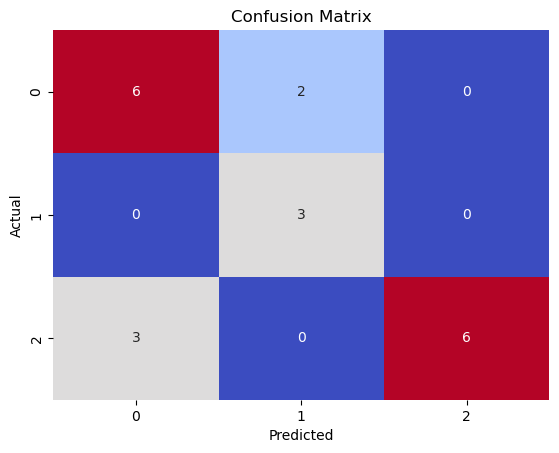

In [66]:
cm=confusion_matrix(y_test,y_pred)
sns.heatmap(cm,annot=True,fmt="d",cmap="coolwarm",cbar=False)
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()